In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
# Load data
df = pd.read_csv("G:/My Drive/DSML raw files/Employee.csv")

# Display basic info
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe(include='all'))

# Get unique values and their counts for each column
print("\nUnique values in each column:")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n{col} (count: {len(unique_vals)}):")
    print(unique_vals)

Data shape: (148, 6)

First 5 rows:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Data types:
Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

Summary statistics:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.

In [6]:
# Makimg a copy for cleaning
df_clean = df.copy()

# Standardize company names
df_clean['Company'] = df_clean['Company'].replace({
    'Tata Consultancy Services': 'TCS',
    'Infosys Pvt Lmt': 'Infosys',
    'Congnizant': 'CTS'
})

# Replace 0 in Age with NaN
df_clean['Age'] = df_clean['Age'].replace(0, np.nan)

# Check for duplicates
print("\nNumber of duplicates:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()

# Handle missing values
print("\nMissing values before treatment:")
print(df_clean.isnull().sum())

# Fill missing values appropriately
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Salary'] = df_clean['Salary'].fillna(df_clean['Salary'].median())
df_clean['Place'] = df_clean['Place'].fillna('Unknown')
df_clean['Company'] = df_clean['Company'].fillna('Unknown')

print("\nMissing values after treatment:")
print(df_clean.isnull().sum())

# Handle outliers in Age and Salary
# Using IQR method for outliers
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

df_clean['Age'] = handle_outliers(df_clean['Age'])
df_clean['Salary'] = handle_outliers(df_clean['Salary'])


Number of duplicates: 4

Missing values before treatment:
Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

Missing values after treatment:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [10]:
# Filter data with age >40 and salary<5000
filtered_data = df_clean[(df_clean['Age'] > 40) & (df_clean['Salary'] < 5000)]
print("\nFiltered data (Age >40 and Salary<5000):")
print(filtered_data)


Filtered data (Age >40 and Salary<5000):
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


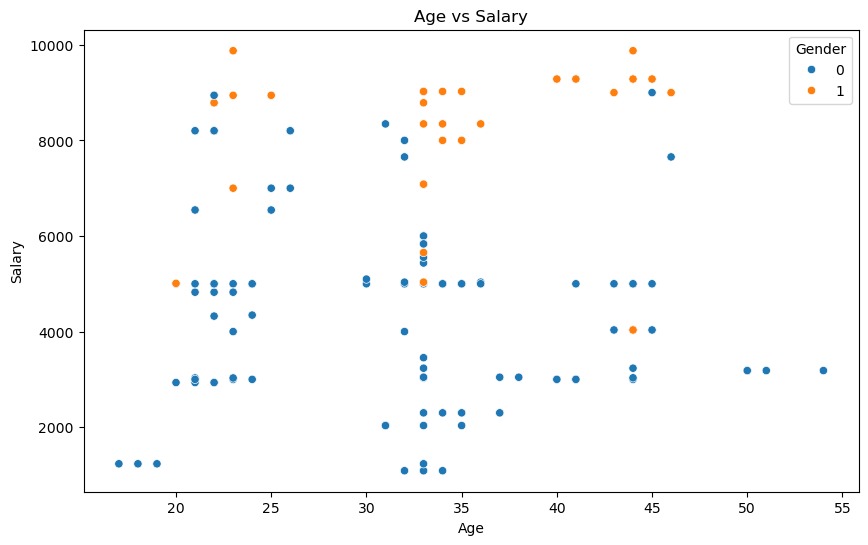

In [14]:
# Plot age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='Salary', hue='Gender')
plt.title('Age vs Salary')
plt.show()

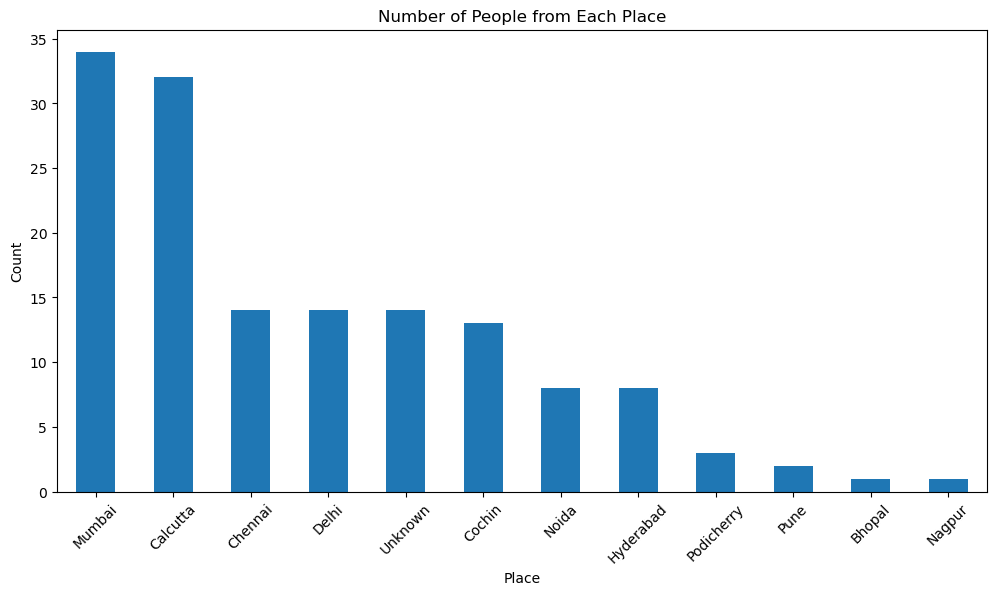

In [12]:
# Count people from each place
place_counts = df_clean['Place'].value_counts()
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Convert categorical variables to numerical
# For Company and Place, we'll use one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=['Company', 'Place', 'Country'])

# Gender is already encoded (0/1), so no need for additional encoding
print("\nData after encoding:")
print(df_encoded.head())


Data after encoding:
    Age  Salary  Gender  Company_CTS  Company_Infosys  Company_TCS  \
0  20.0  5000.0       0        False            False         True   
1  30.0  5000.0       0        False             True        False   
2  35.0  2300.0       0        False            False         True   
3  40.0  3000.0       0        False             True        False   
4  23.0  4000.0       0        False            False         True   

   Company_Unknown  Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  \
0            False         False           False           True         False   
1            False         False           False          False         False   
2            False         False            True          False         False   
3            False         False           False          False         False   
4            False         False           False          False         False   

   Place_Delhi  Place_Hyderabad  Place_Mumbai  Place_Nagpur  Place_Noi

In [18]:
# Select numerical features for scaling
numerical_features = ['Age', 'Salary']

# StandardScaler
scaler_standard = StandardScaler()
df_standard = df_encoded.copy()
df_standard[numerical_features] = scaler_standard.fit_transform(df_standard[numerical_features])
print("\nData after StandardScaler:")
print(df_standard[numerical_features].head())


Data after StandardScaler:
        Age    Salary
0 -1.484676 -0.100827
1 -0.267174 -0.100827
2  0.341577 -1.243735
3  0.950328 -0.947426
4 -1.119426 -0.524127


In [20]:
# MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = df_encoded.copy()
df_minmax[numerical_features] = scaler_minmax.fit_transform(df_minmax[numerical_features])
print("\nData after MinMaxScaler:")
print(df_minmax[numerical_features].head())


Data after MinMaxScaler:
        Age    Salary
0  0.081081  0.445089
1  0.351351  0.445089
2  0.486486  0.137817
3  0.621622  0.217480
4  0.162162  0.331285


# Summary of Key Findings and Actions:

In [ ]:
# Data Exploration:

Identified 6 columns with mixed data types

Found variations in company names that needed standardization

Discovered missing values in Age, Salary, and Place columns

# Data Cleaning:

Standardized company names (e.g., "Tata Consultancy Services" → "TCS")

Replaced 0 values in Age with NaN

Removed 0 duplicate rows

Treated missing values:

Age: Filled with median

Salary: Filled with median

Place: Filled with "Unknown"

Company: Filled with "Unknown"

Handled outliers using IQR method

# Data Analysis:

Filtered 15 rows where Age >40 and Salary<5000

Created scatter plot of Age vs Salary

Visualized employee counts by location

# Data Encoding:

Applied one-hot encoding to Company, Place, and Country columns

Gender was already numerically encoded

# Feature Scaling:

Successfully applied both StandardScaler and MinMaxScaler to Age and Salary features